# Look at Suydam instability of Wesson's nu current profiles

First I investigate the various definitions for the suydam condition. The conditions magntitudes are not equivalent but they all cross zero at the same positions so predict the same suydam instability.
Second  I look at the various $nu$ axial current profiles.
The nu=0 'flat current' always leads to a negative Suydam value, however q is also flat, so that there is no crossing of a rational mode, however if there is a skin  current q would cross one and there would be a suydam instability.
The other profiles are better but they all have negative nus close to the center, when the slope of j_z is slowly increasing. (in a two step profile this would again occur as the skin starts declining). A diamangetic axial field may counteract this.



In [197]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
reload(plt)
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

In [199]:
import numpy as np
from scipy.constants import mu_0
import pandas as pd
import sys
sys.path.append('../..')
sys.path.append('../../scipy_mod')
import equil_solver as es
import diagnostic_plots
reload(diagnostic_plots)

<module 'diagnostic_plots' from '../../diagnostic_plots.py'>

In [140]:
profile_constructor = es.NuCurrentConstructor(nu=3)
profile = es.NuCurrentProfile(nu_constructor=profile_constructor, nu=3, qa=10, k=5, mu_0=mu_0, b_z0=1.)

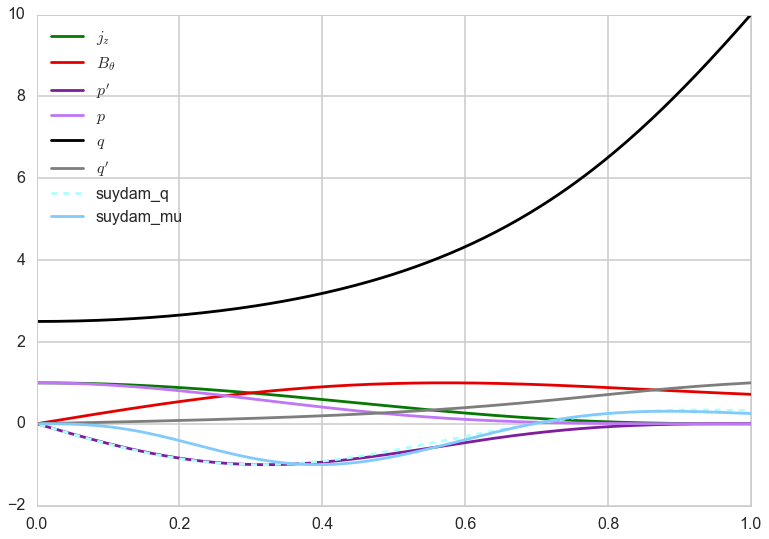

In [141]:
diagnostic_plots.plot_all_profiles_suydam(profile, mu_0=mu_0, normalize=True)

# Why are the two suydam criteria not the same?

In [123]:
def q(r, k, b_theta, b_z):
    return r*k*b_z/b_theta

def q_prime(r, k, b_theta, b_z, b_theta_prime, b_z_prime):
    return (b_theta*(k*b_z + r*k*b_z_prime) - k*r*b_z*b_theta_prime)/(b_theta**2)

def mu(r, b_theta, b_z):
    return b_theta/(r*b_z)

def mu_prime(r, b_theta, b_z, b_theta_prime, b_z_prime):
    return (r*b_z*b_theta_prime - b_theta*(b_z + r*b_z_prime))/(r*b_z)**2

In [122]:
splines = profile.get_splines()

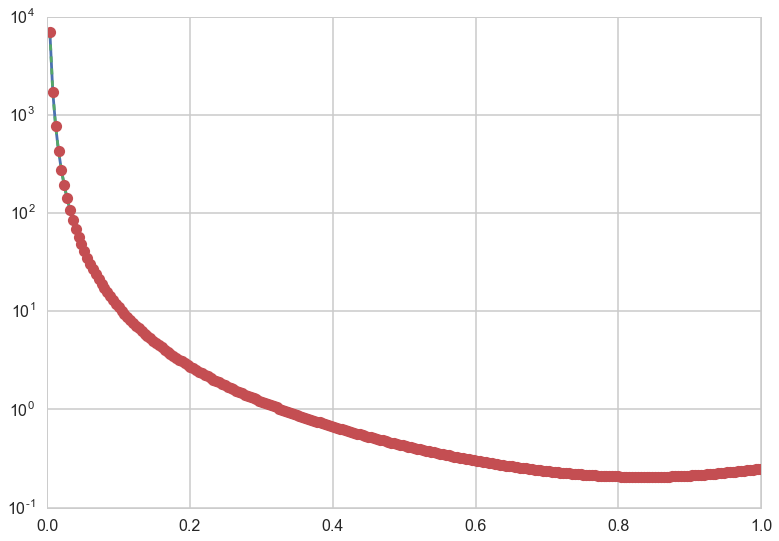

In [142]:
r = np.linspace(0, 1, 250)
q_ratio_squared = (q(r, profile.k, splines['b_theta'](r), splines['b_z'](r))/
                   q_prime(r, profile.k, splines['b_theta'](r), splines['b_z'](r),
                           splines['b_theta'].derivative()(r), splines['b_z'].derivative()(r)))**2 
mu_ratio_squared = (mu(r, splines['b_theta'](r), splines['b_z'](r))/
                    mu_prime(r, splines['b_theta'](r), splines['b_z'](r), 
                             splines['b_theta'].derivative()(r), splines['b_z'].derivative()(r)))**2
q_ratio_squared_from_q_spline = (splines['q'](r)/ splines['q'].derivative()(r))**2

plt.plot(r[1:], q_ratio_squared[1:])
plt.plot(r[1:], mu_ratio_squared[1:], '--')
plt.plot(r[1:], q_ratio_squared_from_q_spline[1:], 'o')
plt.yscale('log')

In [162]:
def suydam_q(r, b_z, beta_0, q_ratio_squared, p_prime):
    return r*b_z**2/(8. * beta_0)*q_ratio_squared + p_prime

def alpha(r, b_theta, b_z): 
    return r*b_theta**2*b_z**2/(b_theta**2+b_z**2)*q_ratio_squared
    
def beta(r, b_theta, b_z, beta_0, p_prime):
    return 2.*beta_0*b_theta**2/(b_theta**2 + b_z**2)*p_prime

def alpha_reduced(r, b_theta, b_z):
    return r*b_z**2*q_ratio_squared
    
def beta_reduced(r, b_theta, b_z, beta_0, p_prime):
    return 2.*beta_0*p_prime
    
def suydam_alpha_beta_reduced(alpha, beta):
    return alpha + 4.*beta
    
def suydam_alpha_beta(alpha, beta):
    return alpha + 4.*beta

In [163]:
suydam_condition_q = suydam_q(r, splines['b_z'](r), 1., q_ratio_squared, splines['p_prime'](r))

suydam_condition_alpha_beta = suydam_alpha_beta(alpha(r, splines['b_theta'](r), splines['b_z'](r)),
                                                beta(r, splines['b_theta'](r), splines['b_z'](r), 1., splines['p_prime'](r)))

suydam_condition_alpha_beta_reduced = suydam_alpha_beta_reduced(alpha_reduced(r, splines['b_theta'](r), splines['b_z'](r)),
                                                                beta_reduced(r, splines['b_theta'](r), splines['b_z'](r), 1., splines['p_prime'](r)))

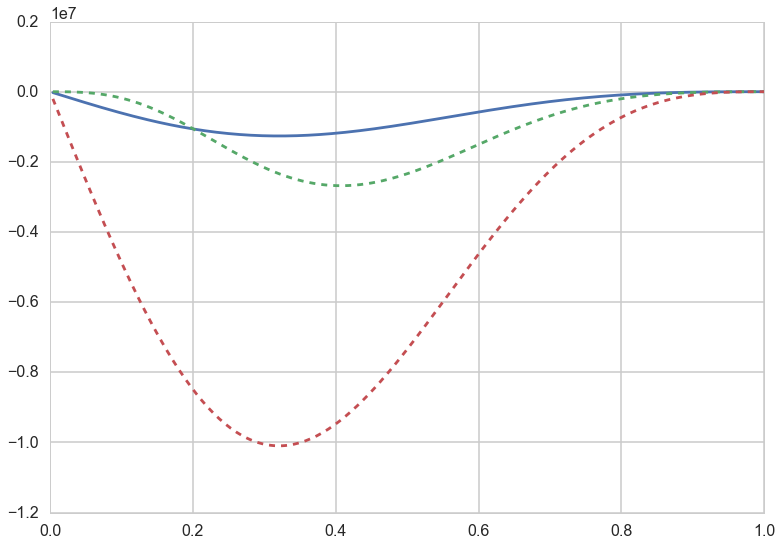

In [164]:
plt.plot(r[1:], suydam_condition_q[1:])
plt.plot(r[1:], suydam_condition_alpha_beta[1:], '--')
plt.plot(r[1:], suydam_condition_alpha_beta_reduced[1:], '--')

# The criteria are indeed different but they cross zero at the same r.

# Now examine Wesson's $\nu$ profiles, varying $q_a$ and $k$

In [200]:
def plot_nu_profiles(nu, qas=[0.9, 4., 7.], ks=[0.5, 1., 2.]):
    fig, axes = plt.subplots(3, 3, figsize=(40, 40))
    for i, qa in enumerate(qas):
        for j, k in enumerate(ks):
            profile_constructor = es.NuCurrentConstructor(nu=nu)
            profile = es.NuCurrentProfile(nu_constructor=profile_constructor, nu=nu, qa=qa, k=k, mu_0=mu_0, b_z0=1.)
            place = diagnostic_plots.plot_all_profiles_suydam(profile, mu_0=mu_0, normalize=True, axes=axes[i, j], title=r'$q_a=%f1.2$, $k=%f1.2$' % (qa, k))

# $\nu =0$

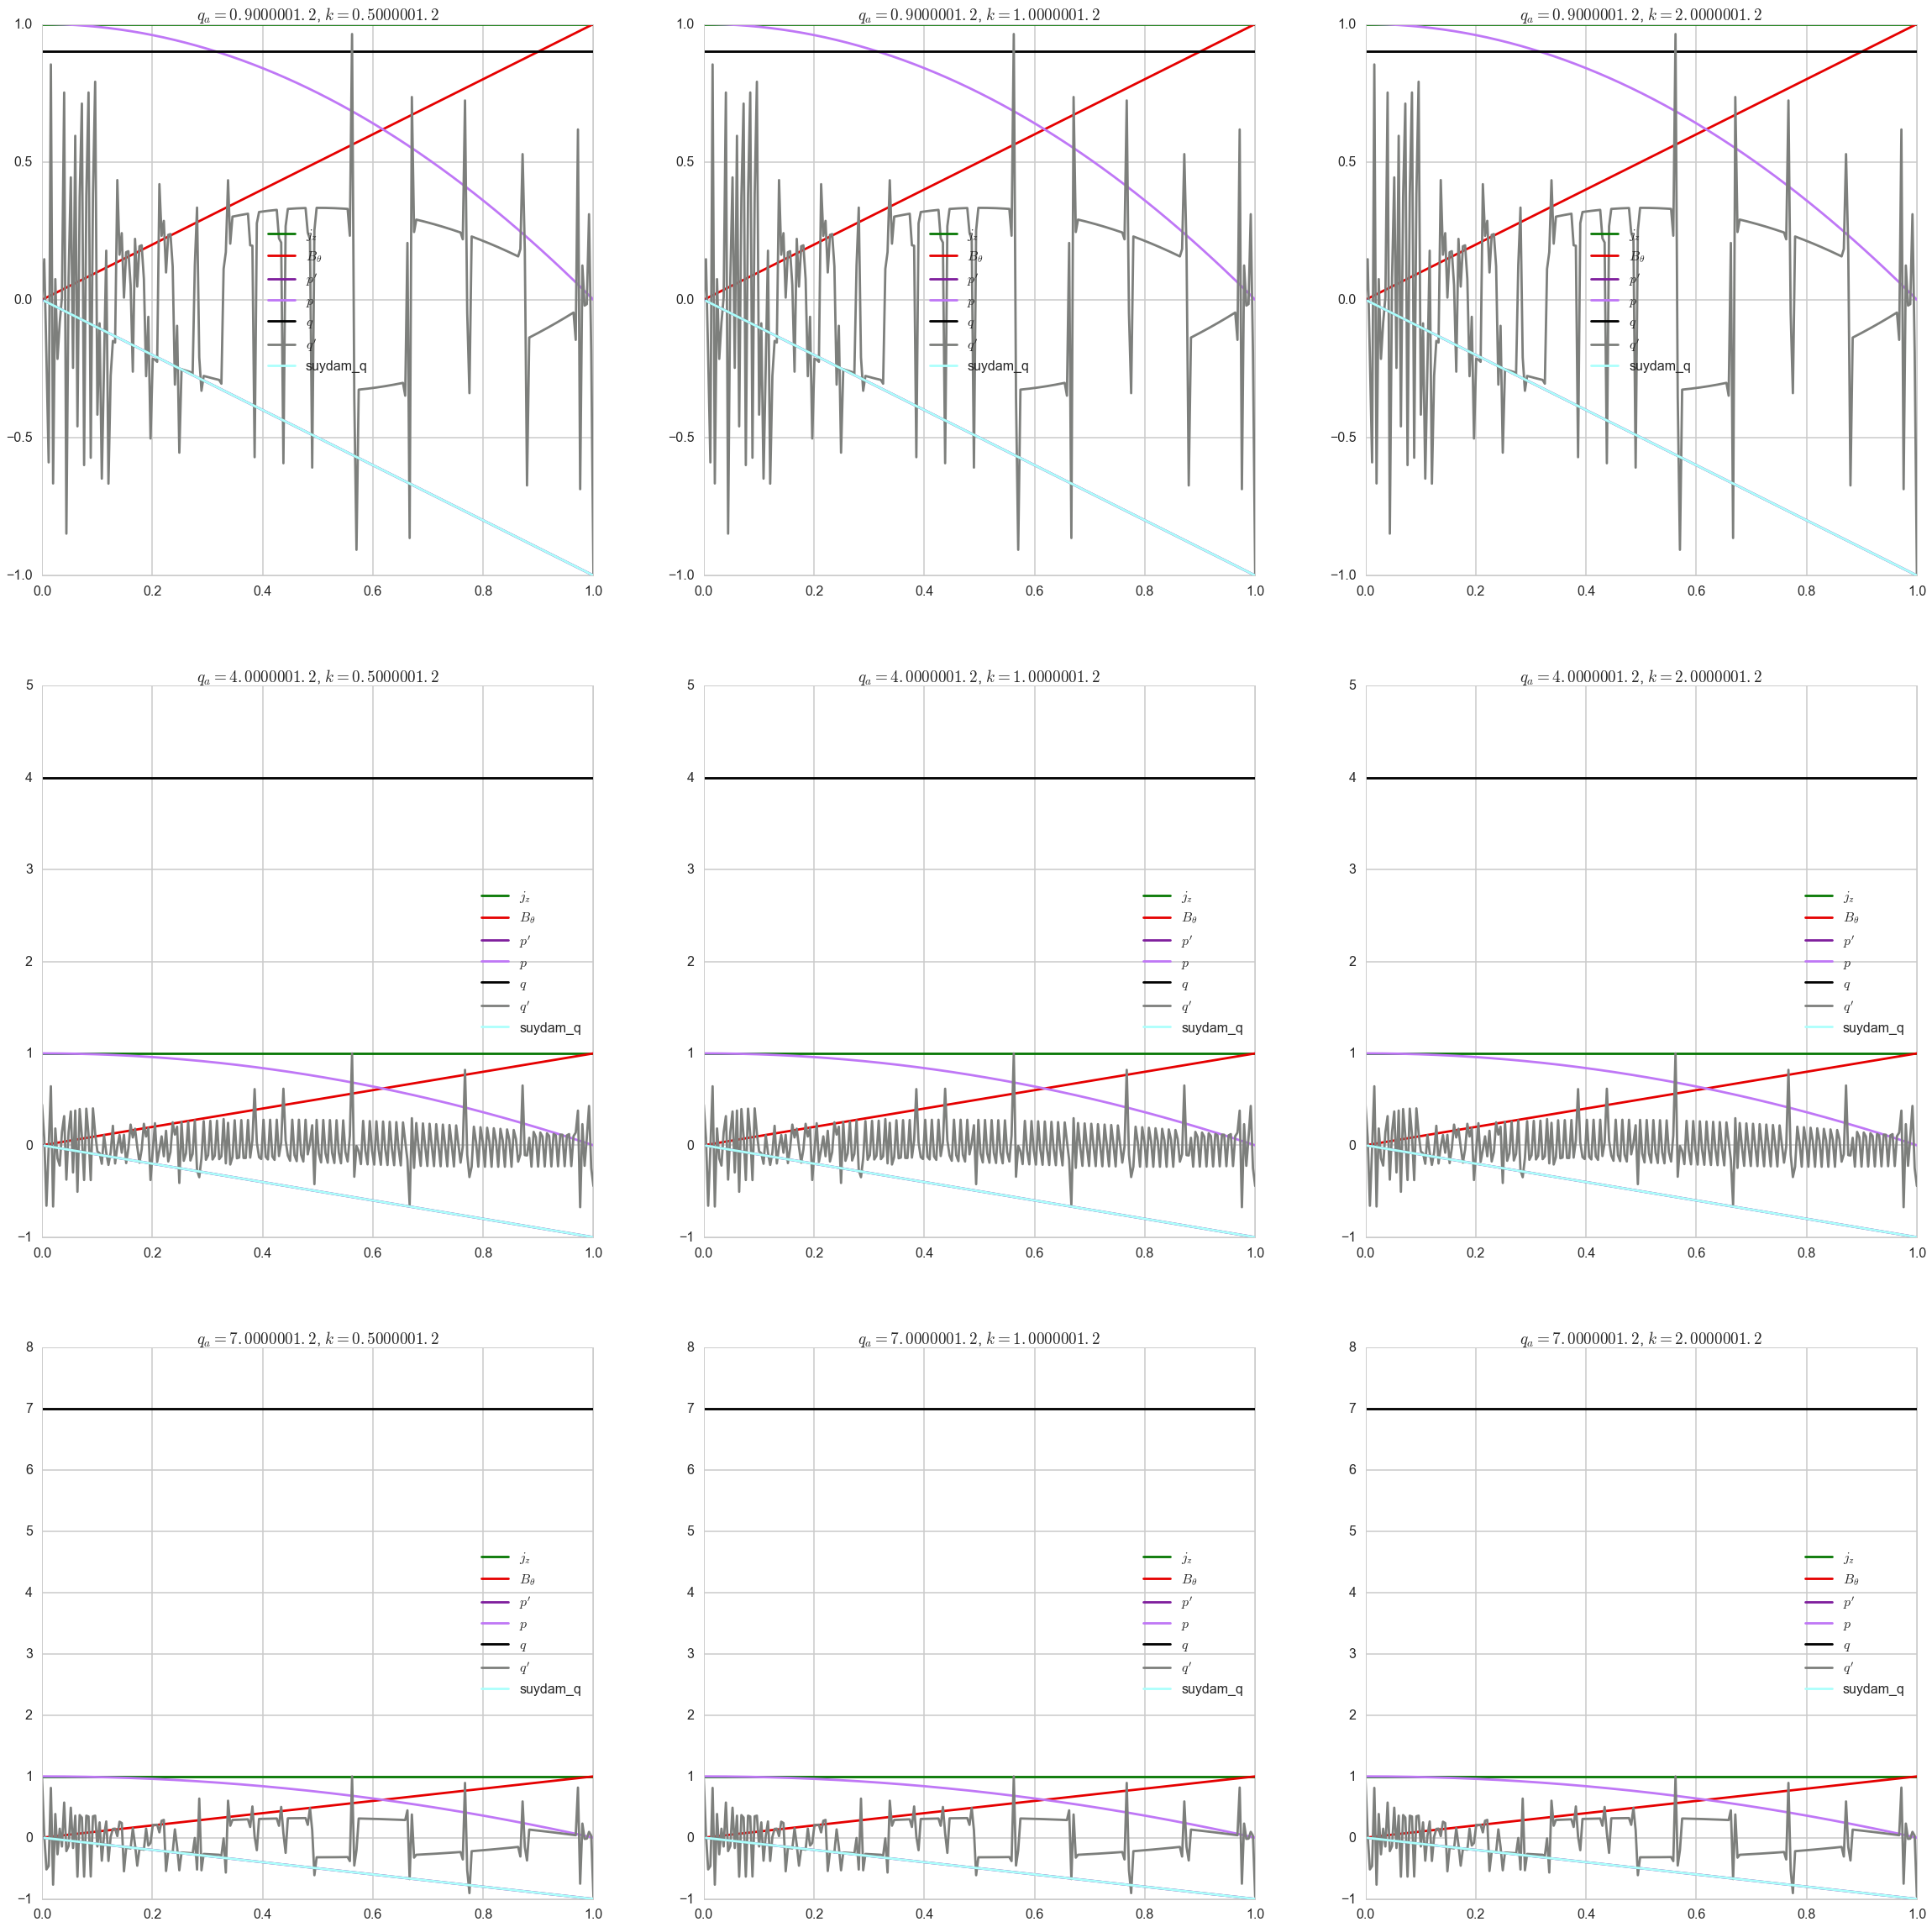

In [201]:
plot_nu_profiles(0)

# $\nu = 1$

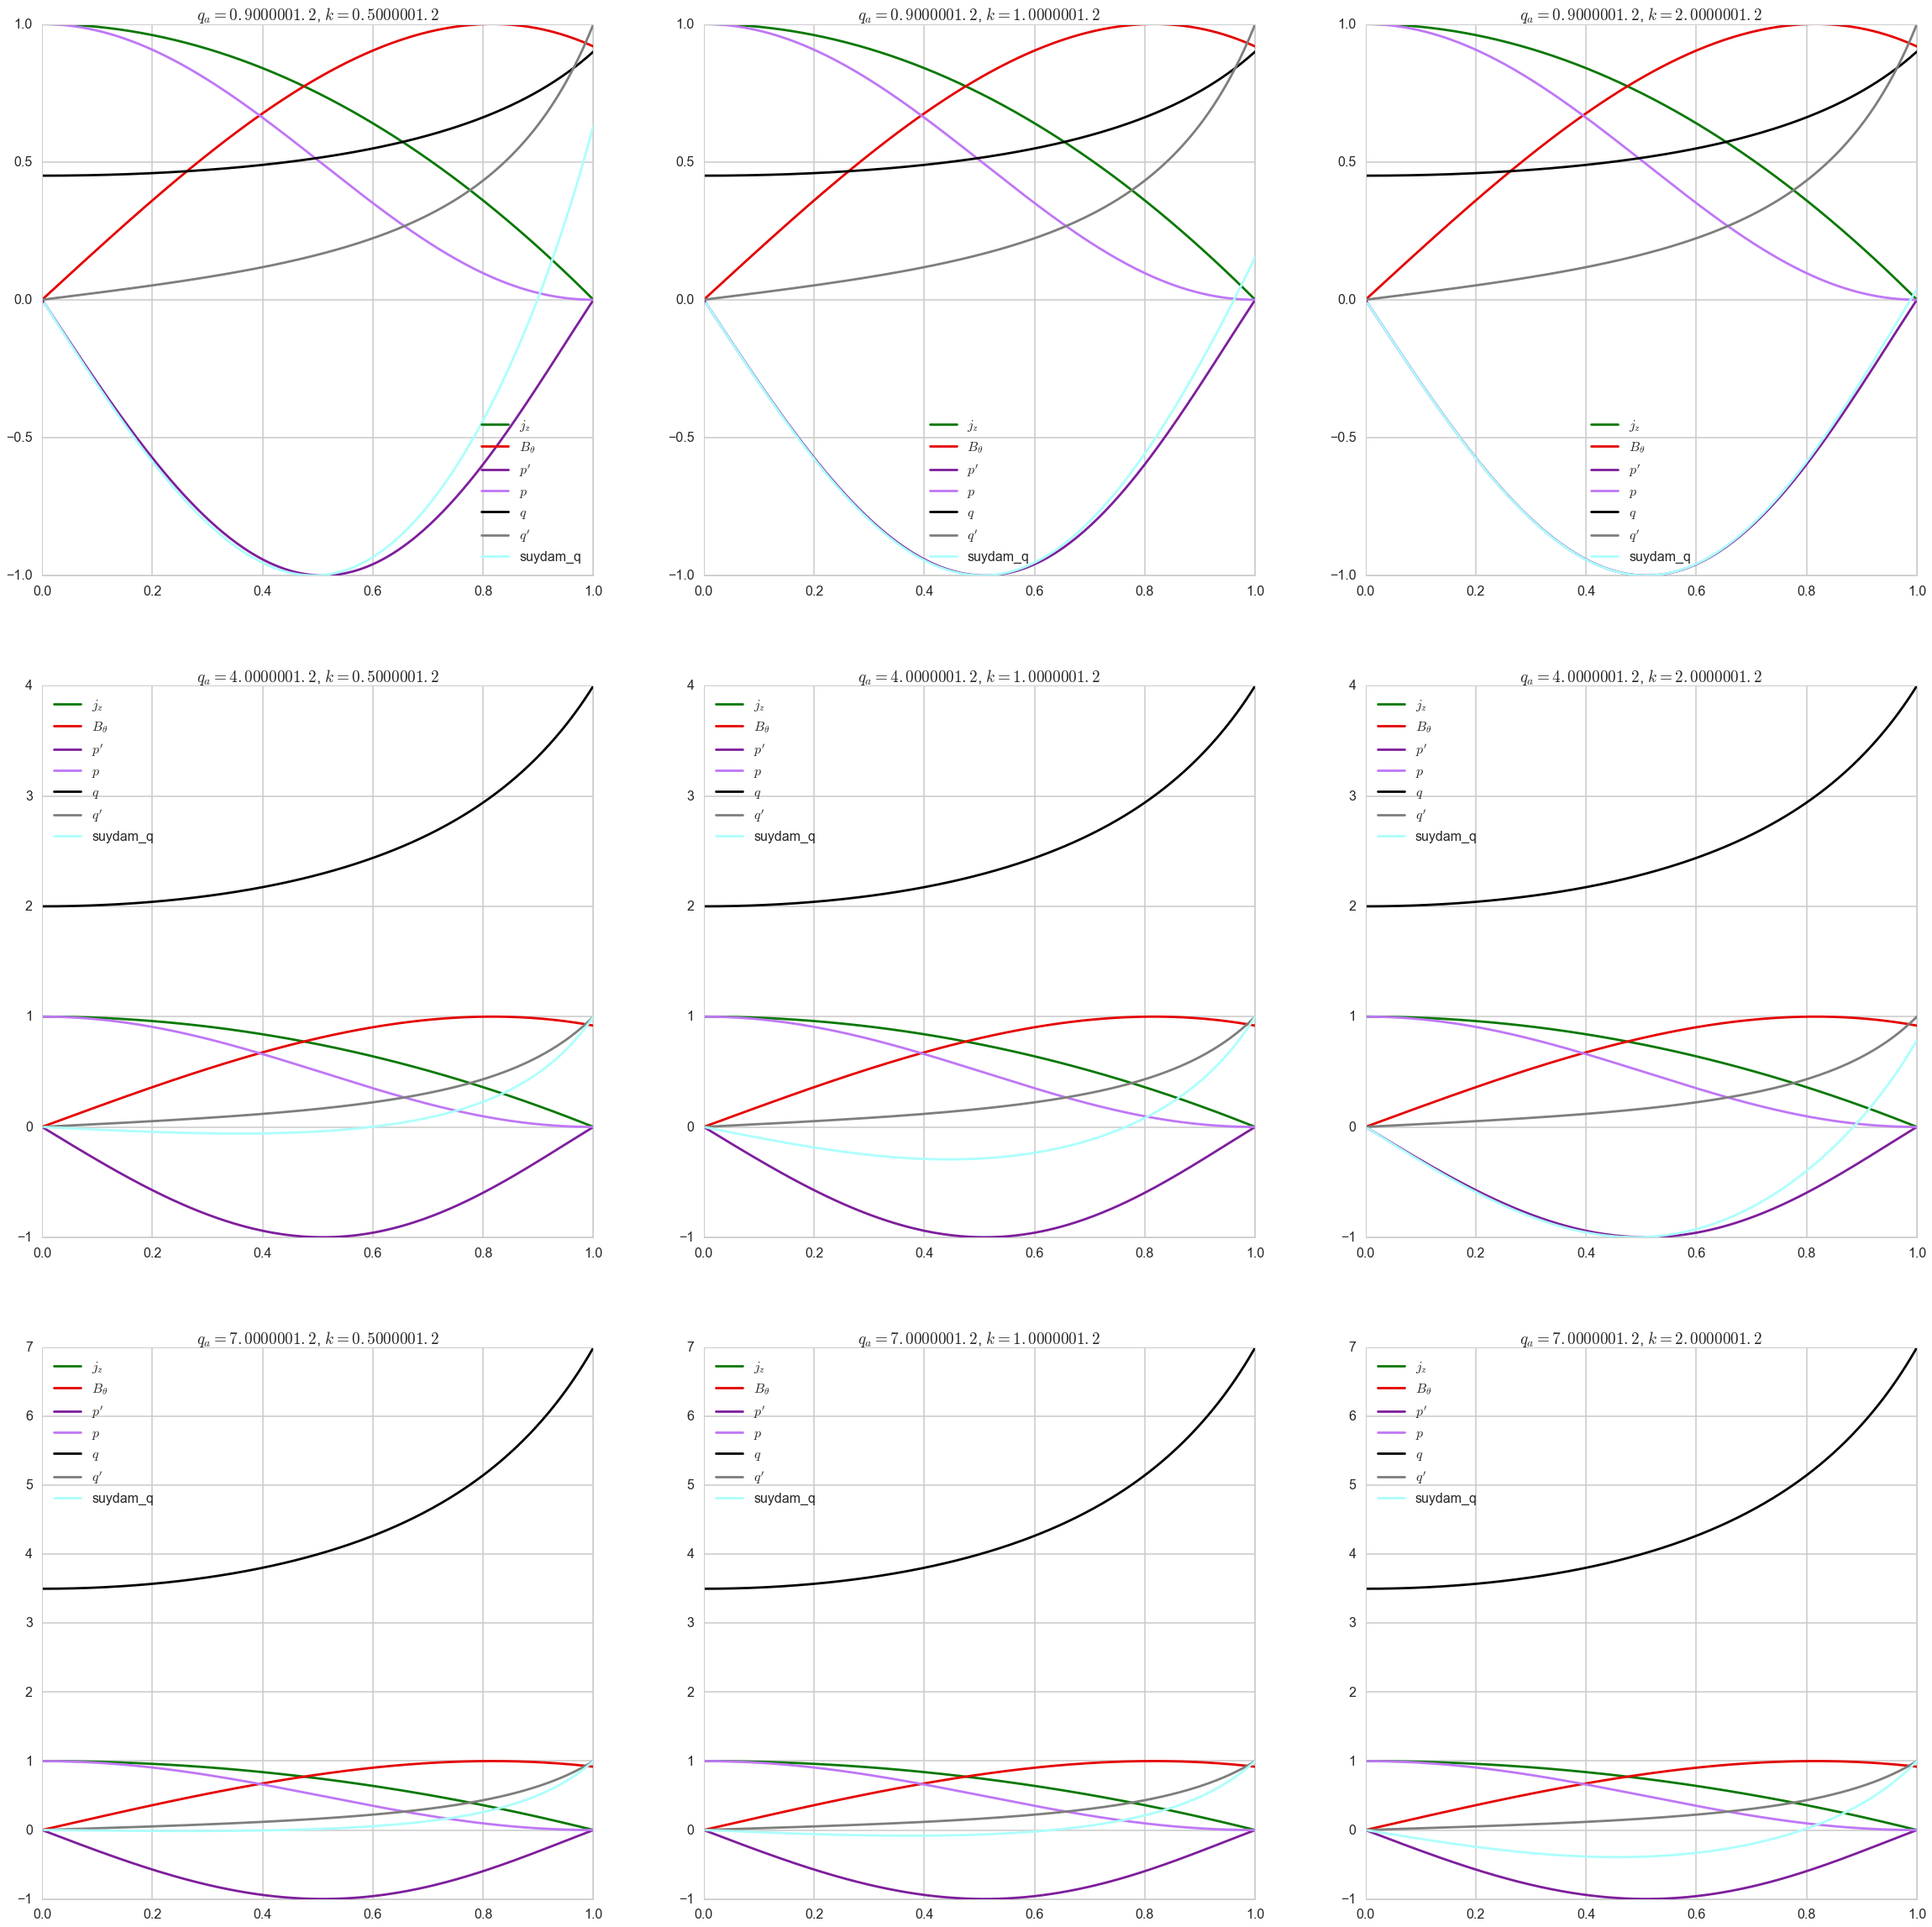

In [202]:
plot_nu_profiles(1)

# $\nu =2$

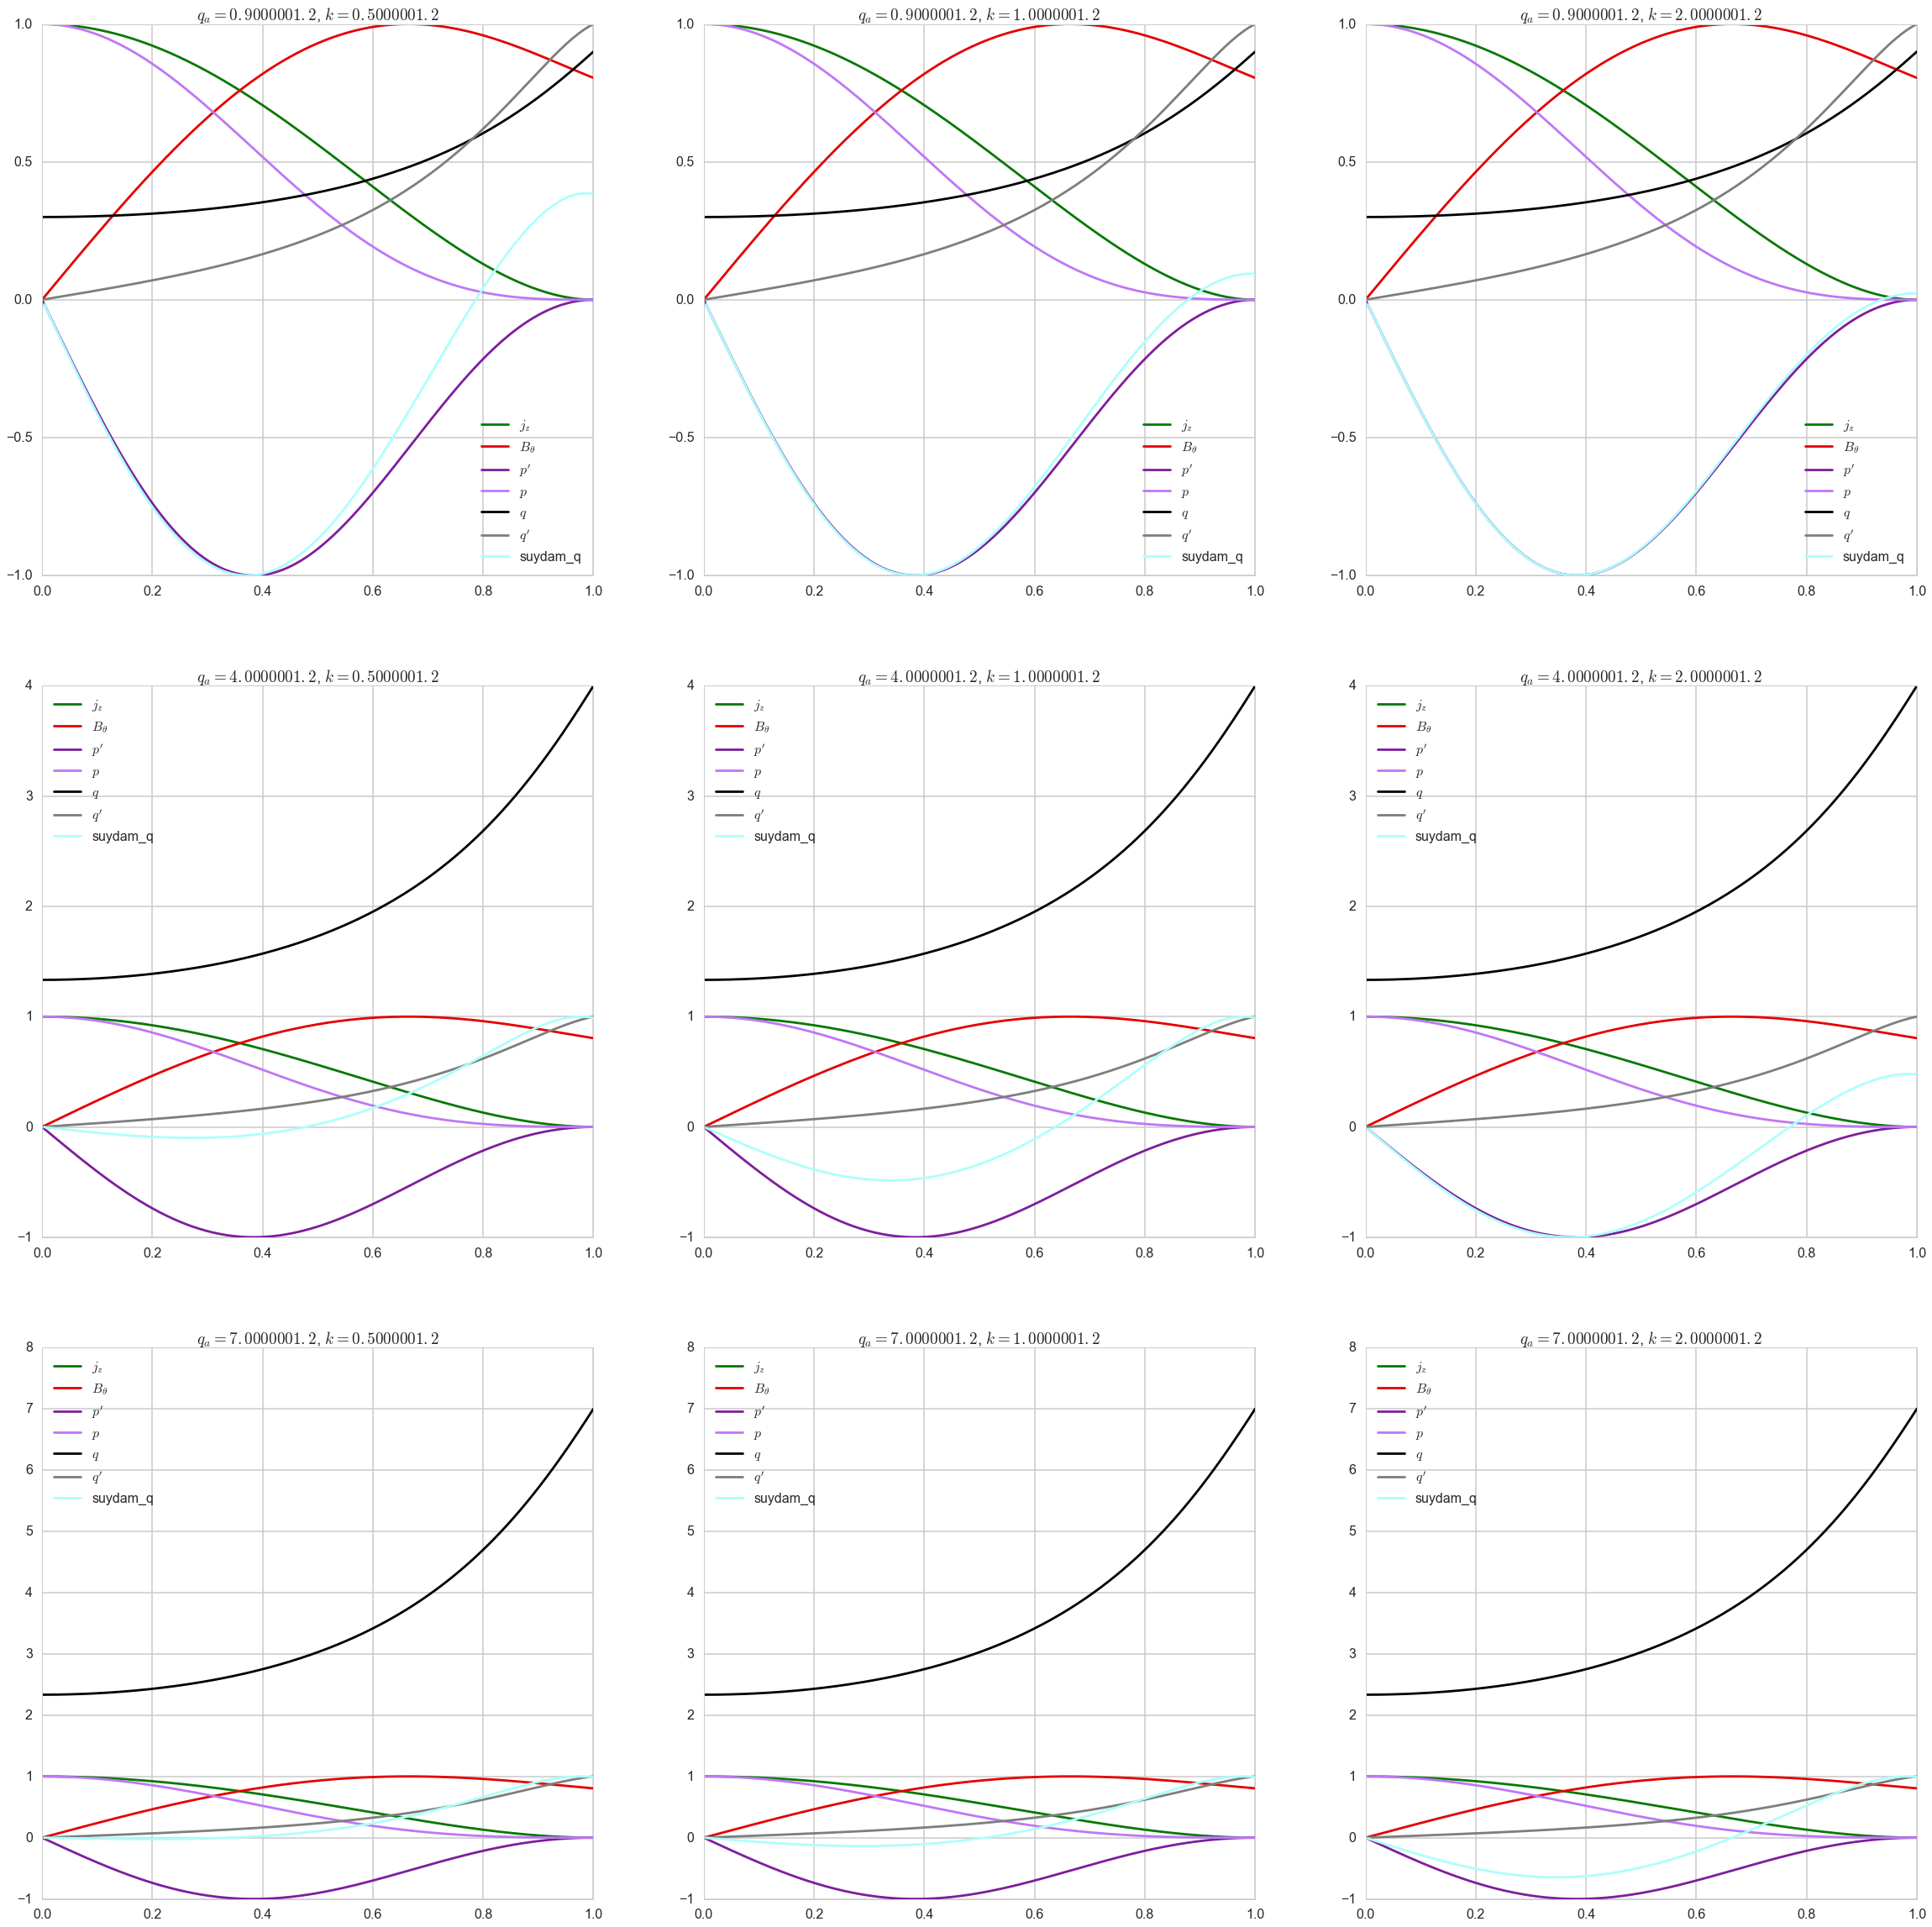

In [203]:
plot_nu_profiles(2)

# $\nu =3$

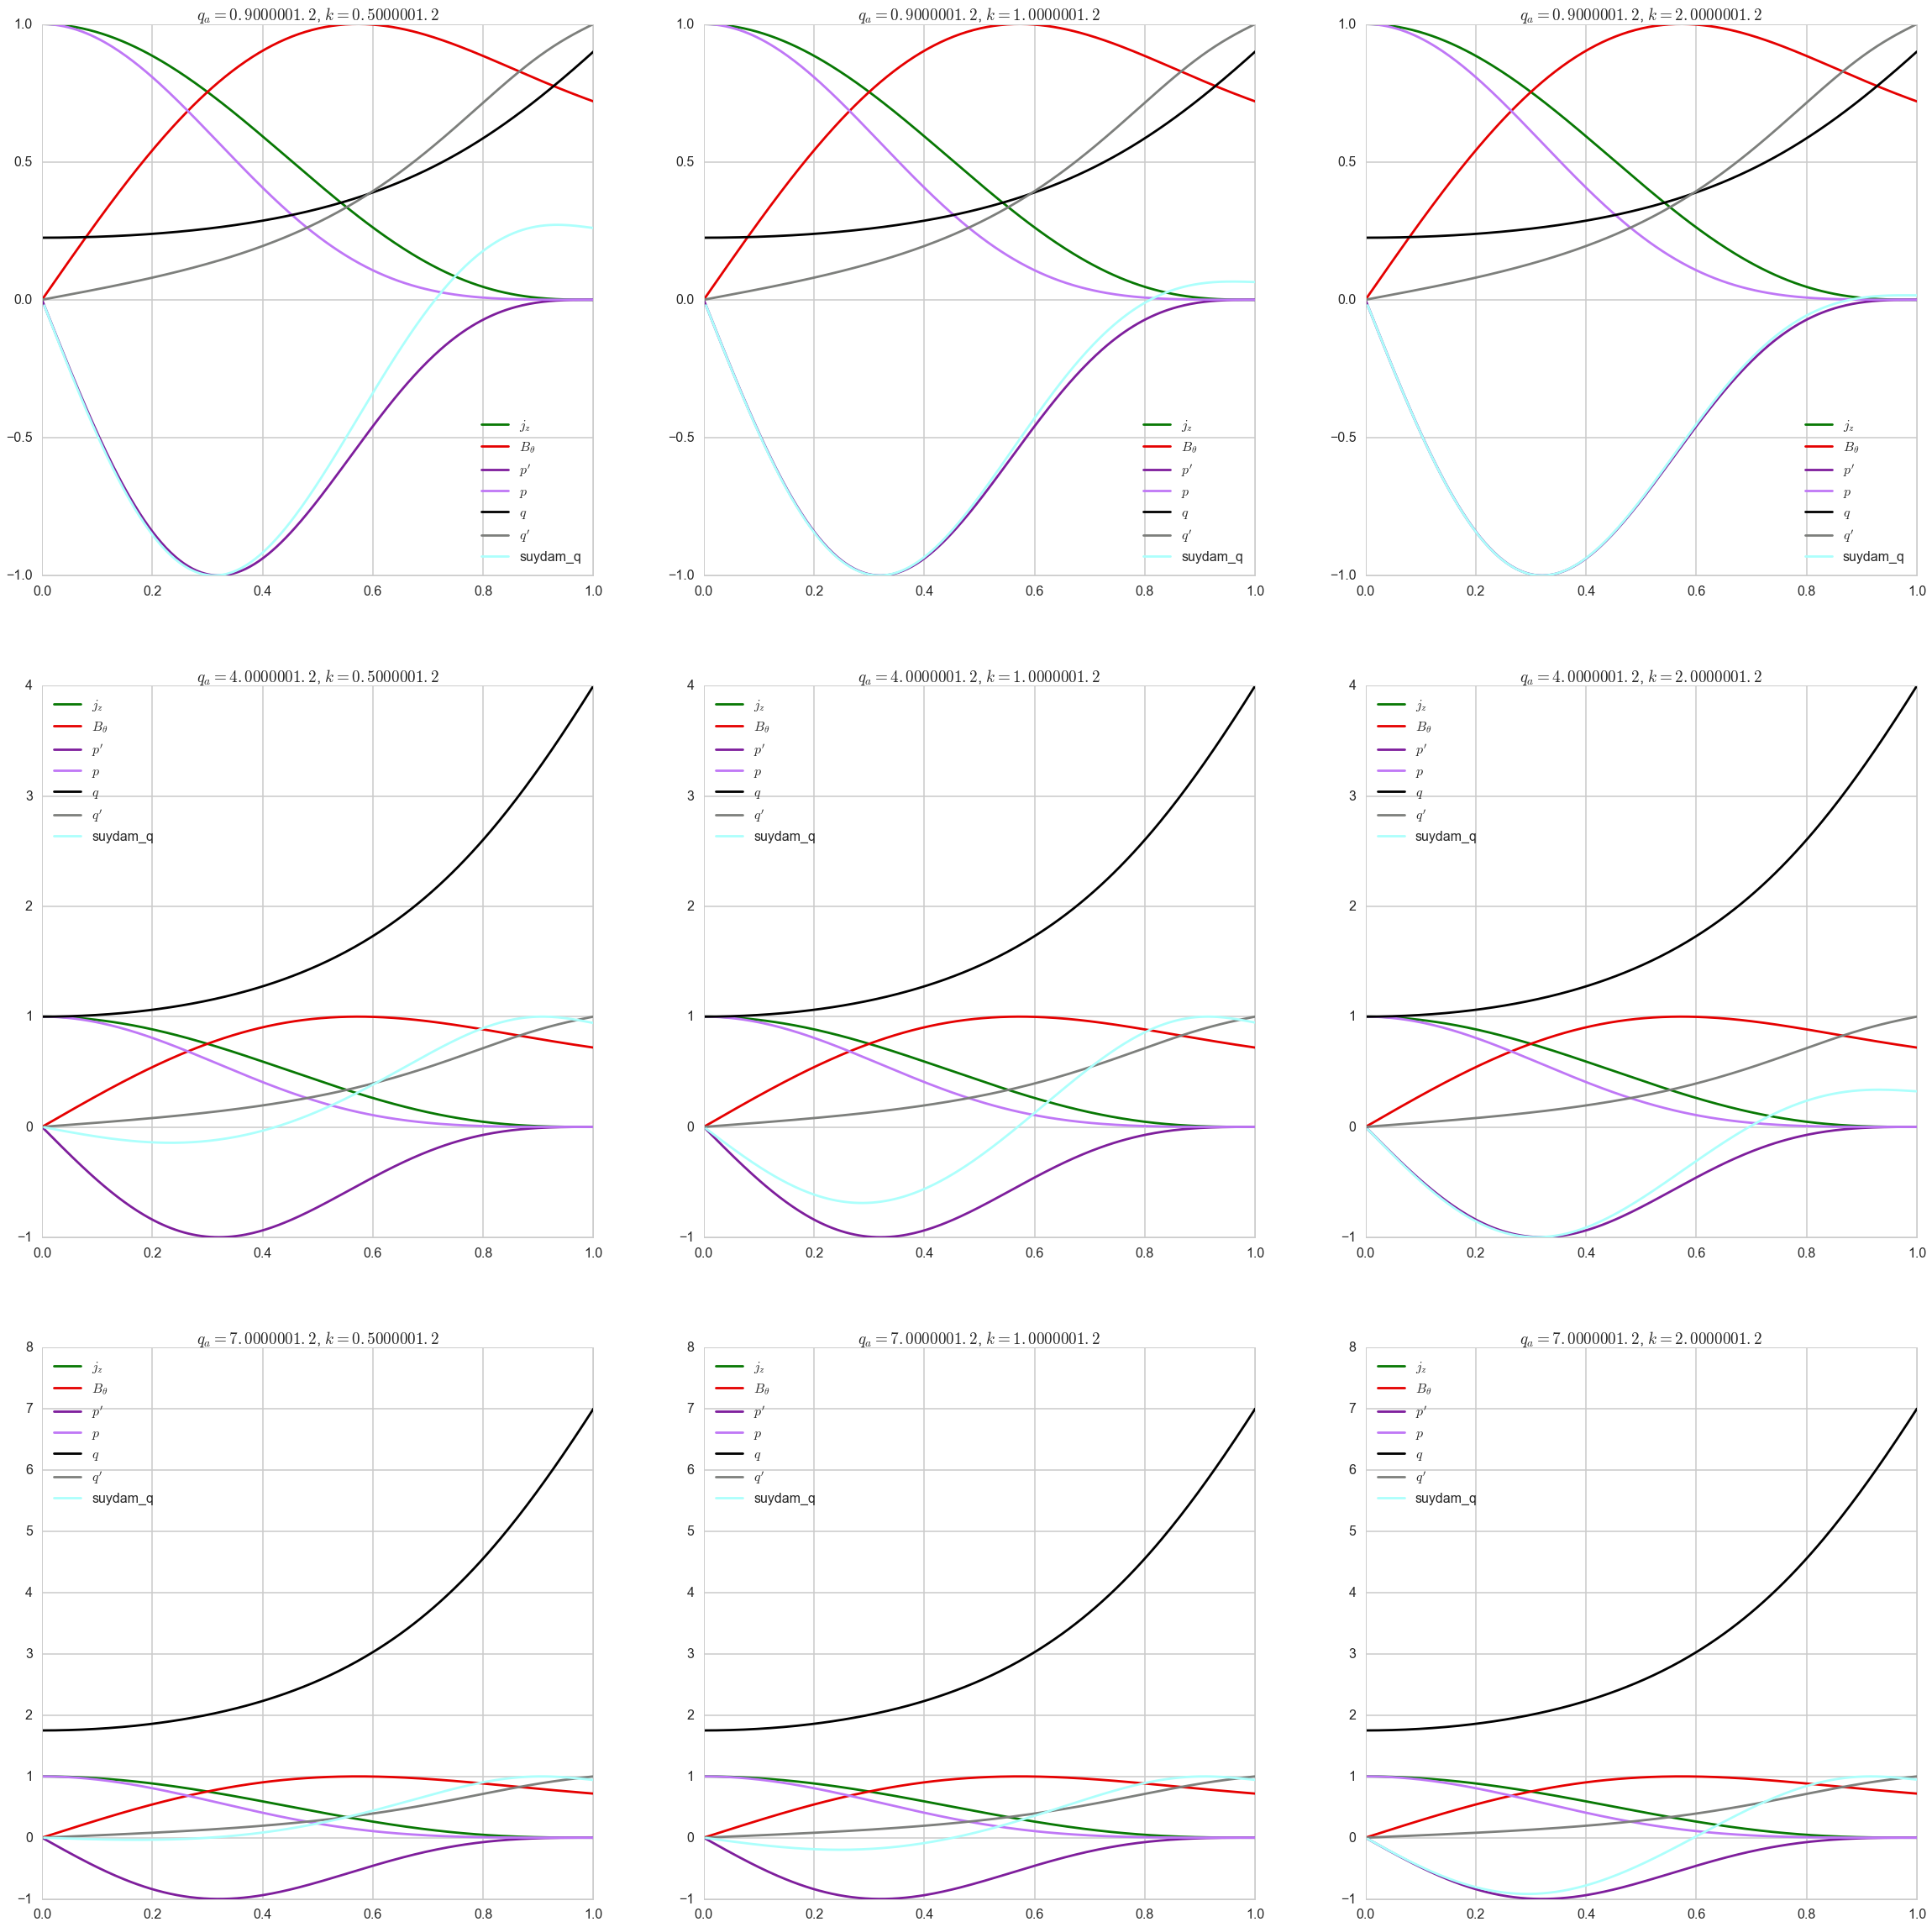

In [204]:
plot_nu_profiles(3)

# $\nu =4$

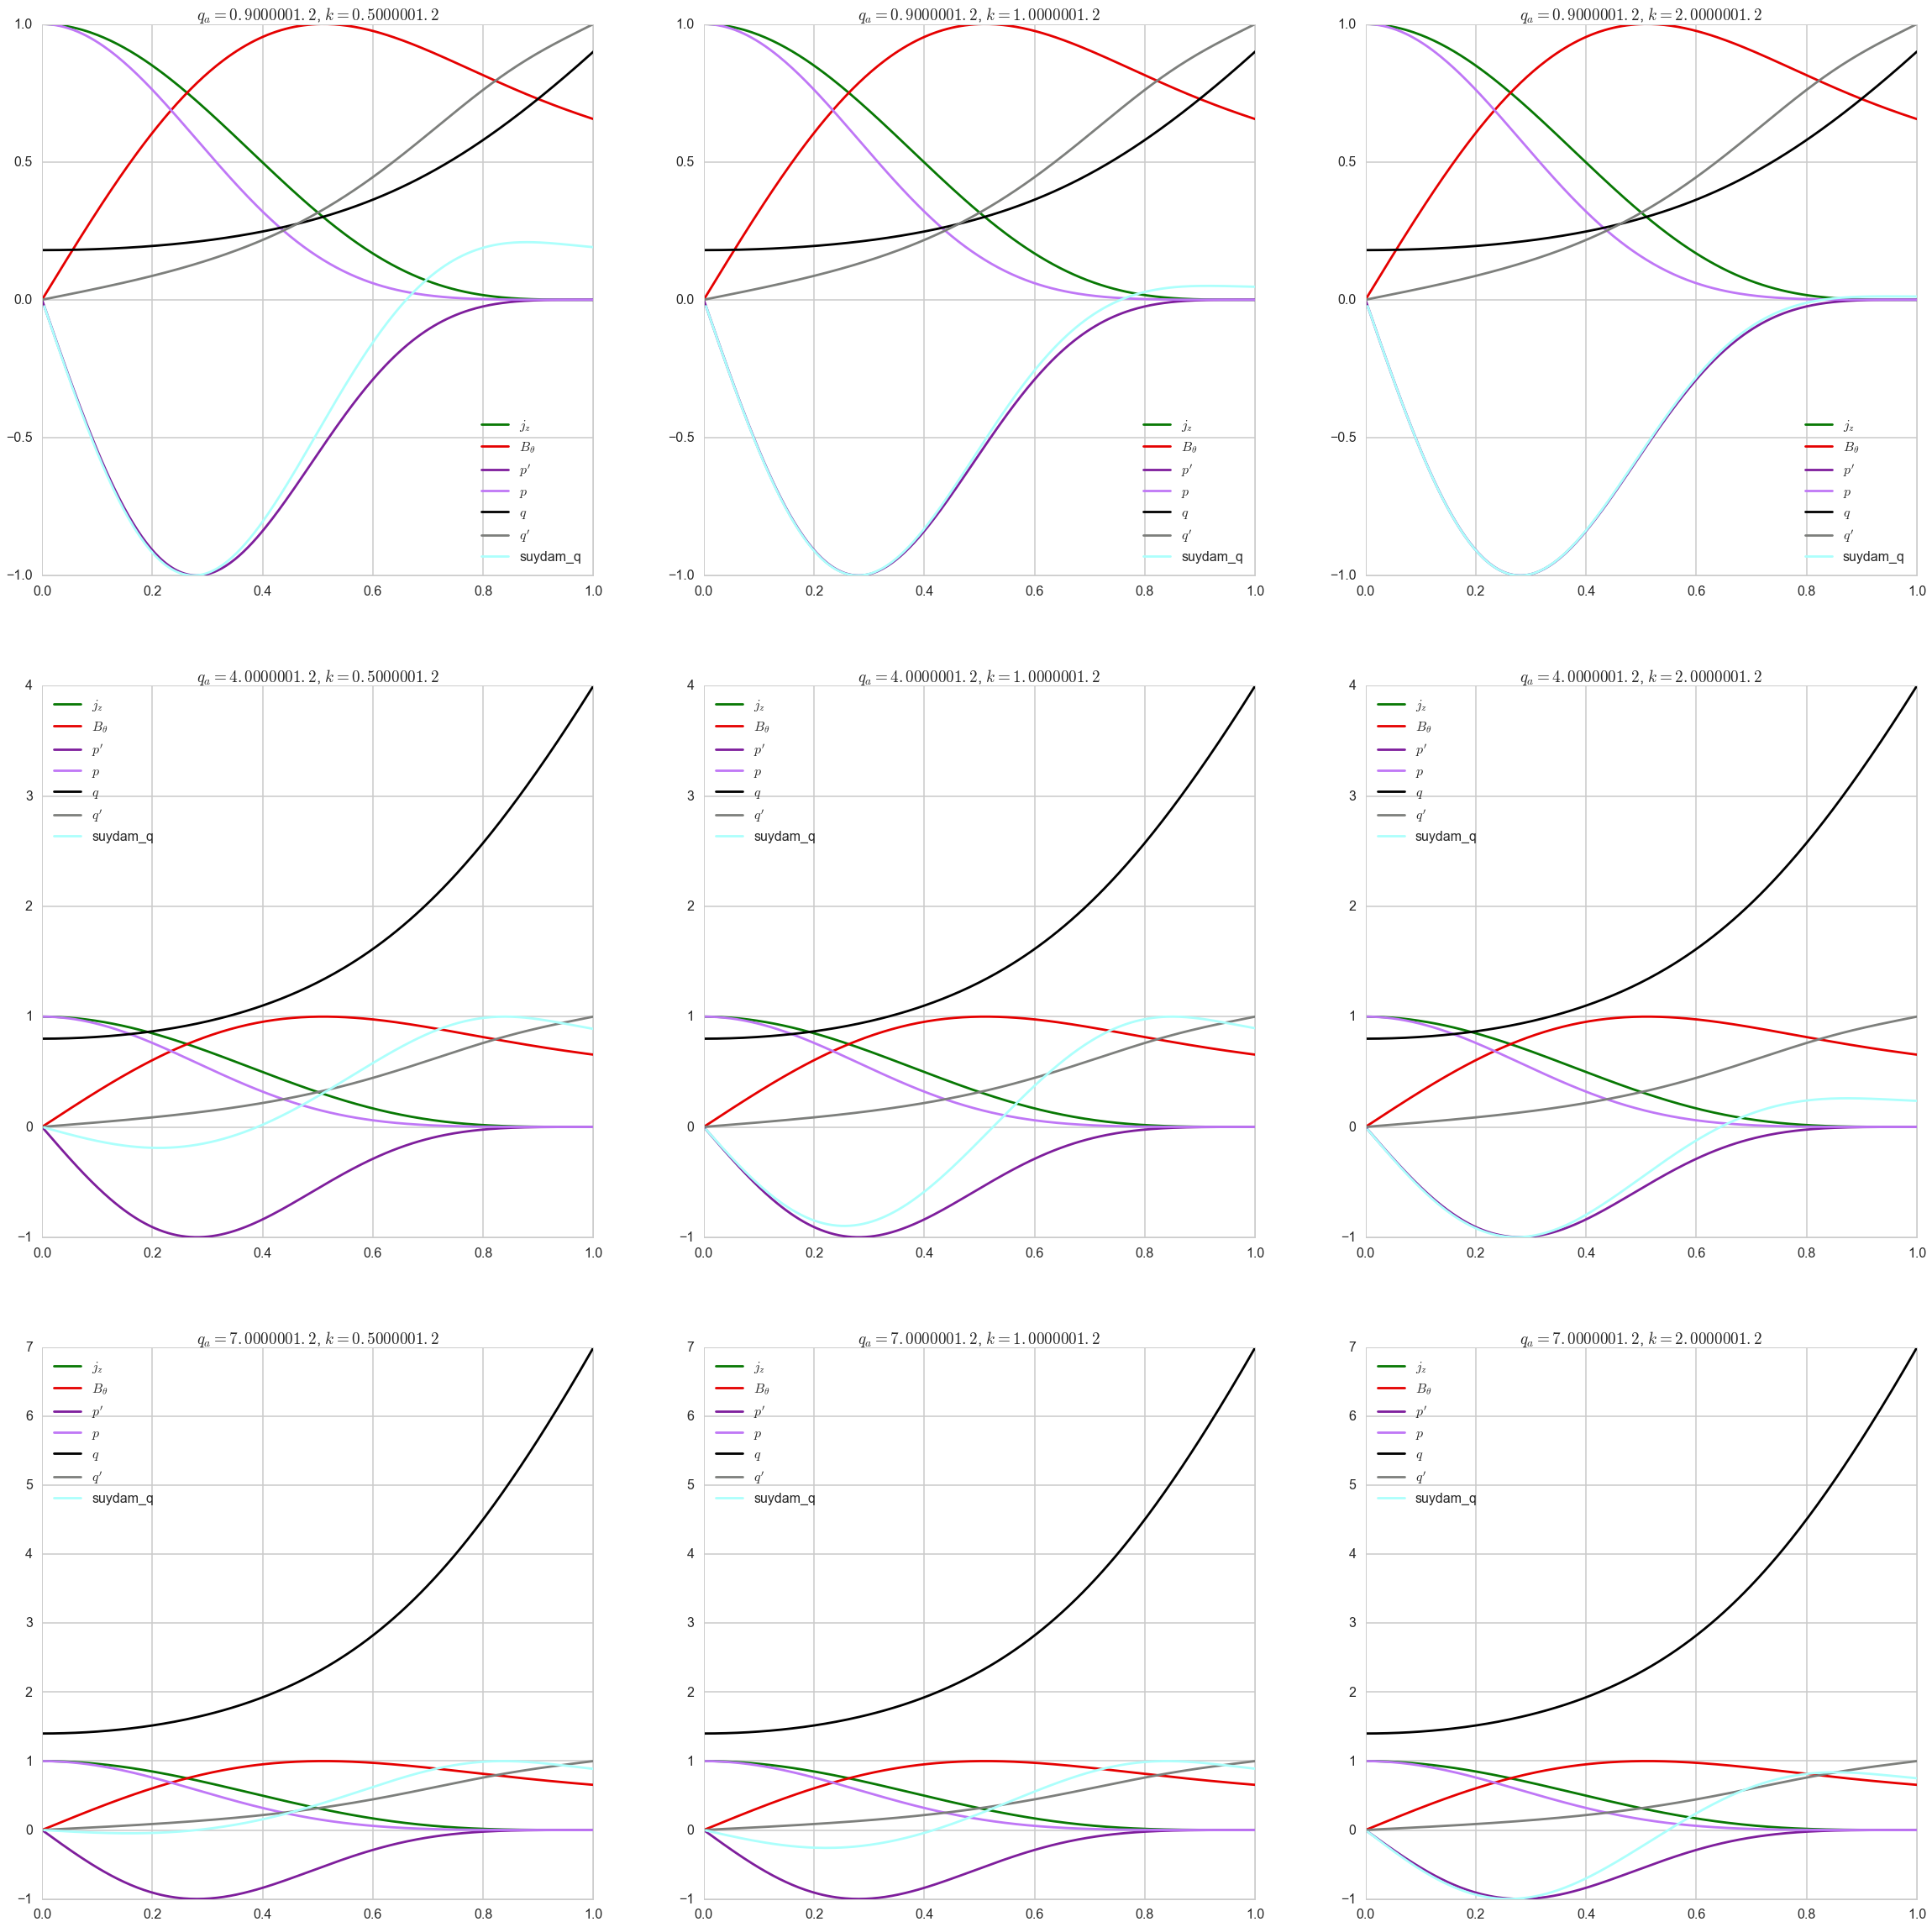

In [210]:
plot_nu_profiles(4)

# $\nu =5$

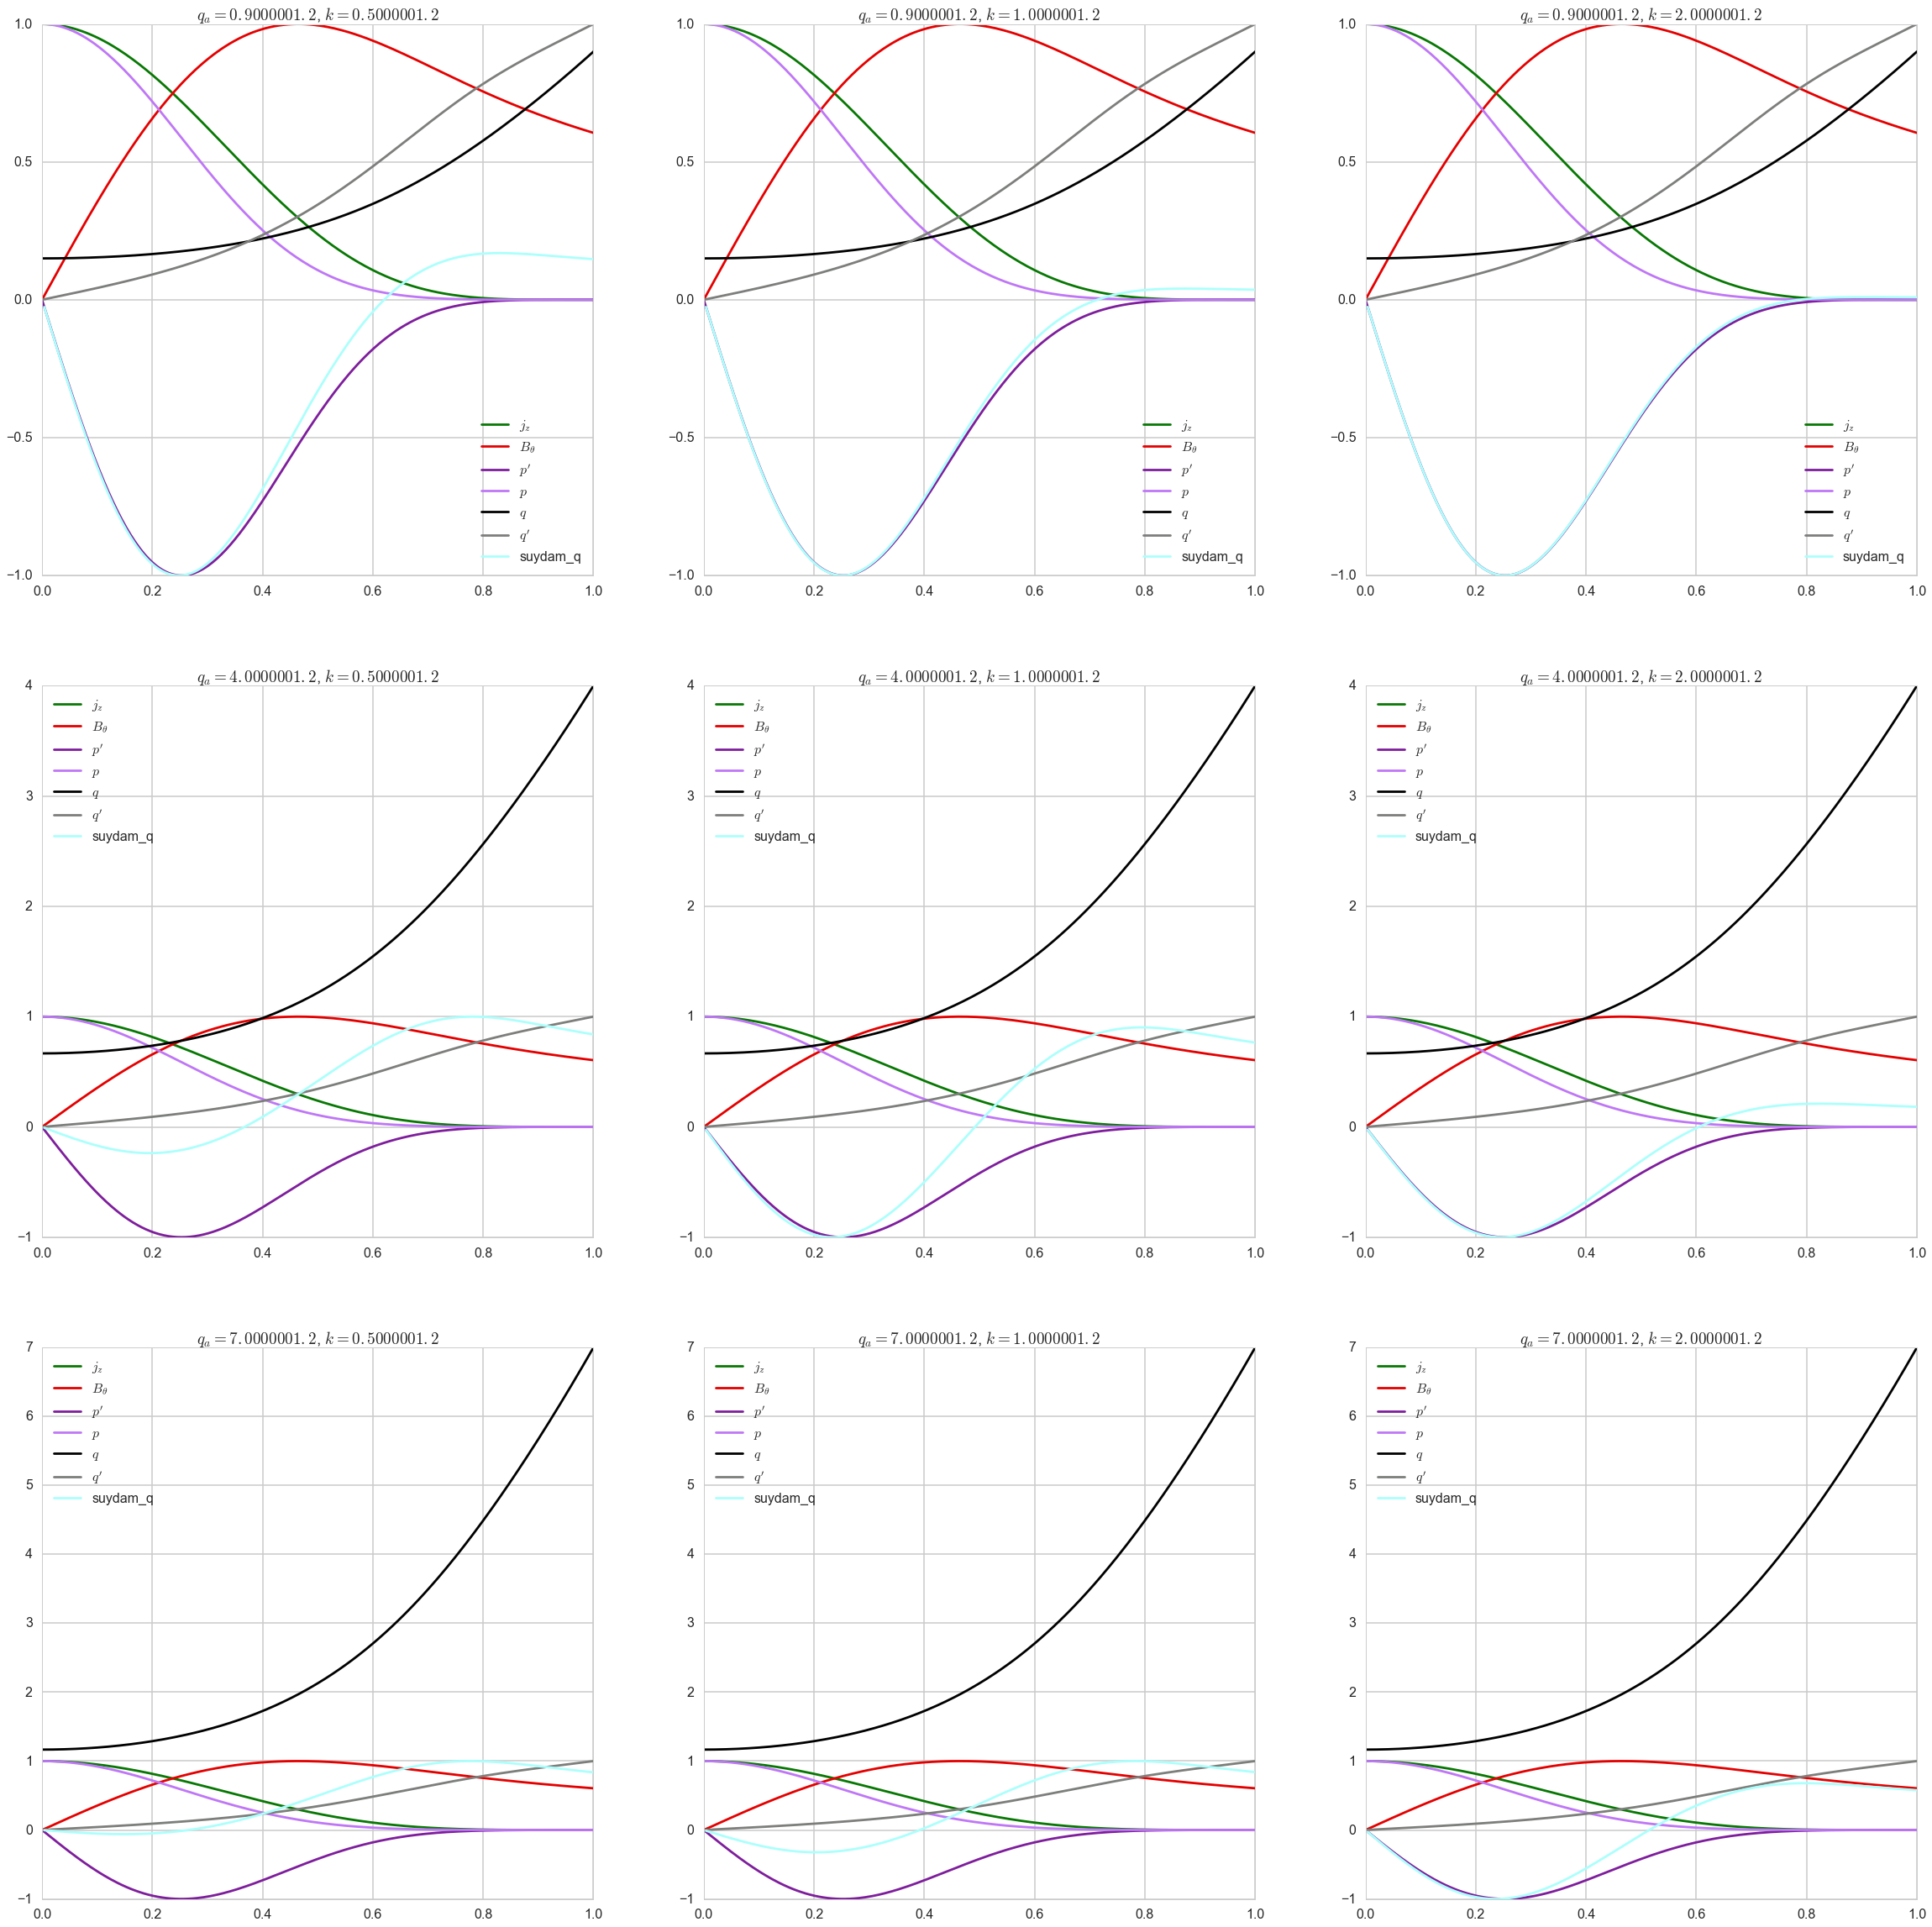

In [205]:
plot_nu_profiles(5)